# Histogram of oriented gradient (HOG)

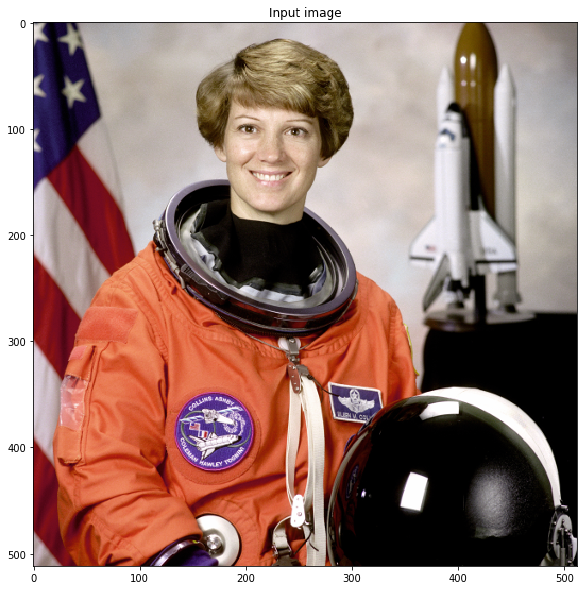

In [3]:
import matplotlib.pyplot as plt
import skimage.feature
import skimage.data

# 다른 데이터로도 확인 가능
# https://scikit-image.org/docs/dev/api/skimage.data.html
image = skimage.data.astronaut()
plt.figure(figsize=(12,10))
plt.imshow(image)
plt.title('Input image')
plt.show()

## HOG feature와 image 추출

In [4]:
hog_feature, hog_image = skimage.feature.hog(image,visualize=True)

In [5]:
print('image : ',image.shape)
print('hog_feature : ',hog_feature.shape)
print('hog_image : ',hog_image.shape)

image :  (512, 512, 3)
hog_feature :  (311364,)
hog_image :  (512, 512)


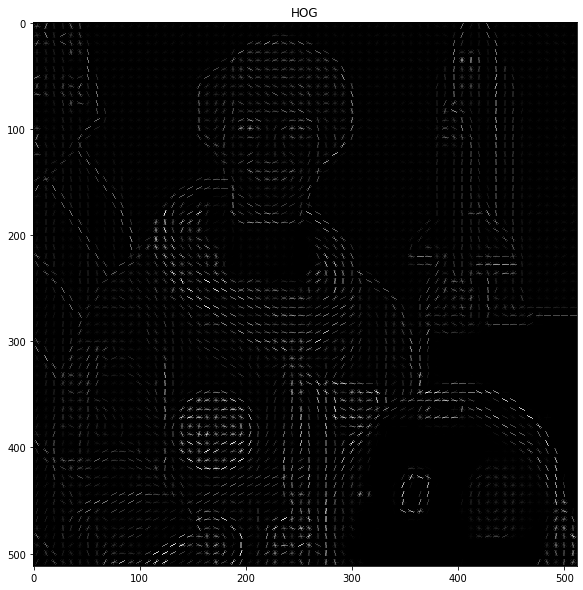

In [6]:
plt.figure(figsize=(12,10))
plt.imshow(hog_image,cmap=plt.cm.gray)
plt.title('HOG')
plt.show()

## feature만 추출할 경우

In [7]:
hog_feature = skimage.feature.hog(image)

In [8]:
print('hog_feature : ',hog_feature.shape)

hog_feature :  (311364,)


# Random Forest Classifier를 이용한 이미지 분류

scikit-learn library에 정의된 RandomForestClassifier()를 이용하여 선언

In [10]:
from skimage import feature
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np


In [16]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [17]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)
print(x_test.shape, x_test.dtype)
print(y_test.shape, y_test.dtype)

170500096/170498071 [==============================] - 31s 0us/step
(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int64


Plotting..


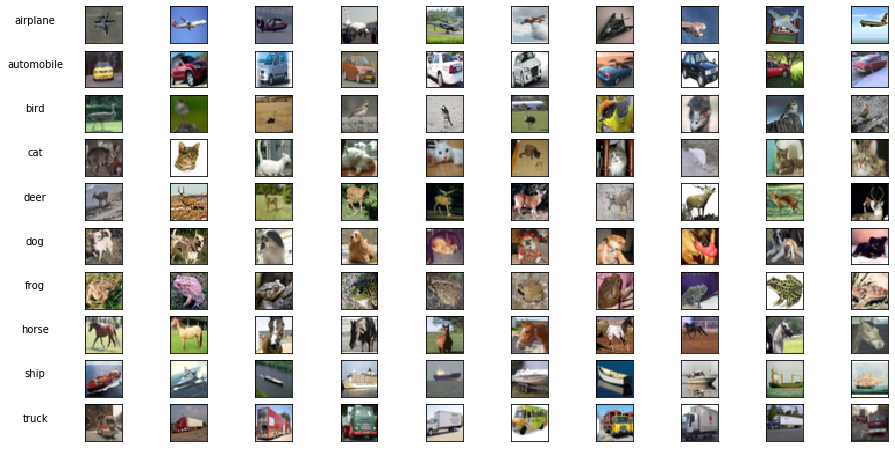

In [18]:
# A helper function for plotting sample images from dataset
def plot_images(images, labels, num_samples):
    cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    fig, axes = plt.subplots(num_samples,num_samples,figsize=(15,8))
    for row in range(num_samples):
        images_for_label = [img for img, label in zip(images, labels) if label == row]
        random_indices = np.random.choice(range(len(images_for_label)), num_samples, replace=False)
        for col, random_idx in enumerate(random_indices):
            axes[row][col].imshow(images_for_label[random_idx])
            axes[row][col].get_xaxis().set_ticks([])
            axes[row][col].get_yaxis().set_ticks([])
        axes[row][0].set_ylabel(cifar_classes[row], labelpad=50,  rotation=0)
    #plt.subplots_adjust(left=0.1, right=0.2)
    plt.savefig('cifar_sample', bbox_inches='tight')

print('Plotting..')
plot_images(x_train, y_train, 10)

In [20]:
def get_hog_features(data):
    hog_data = []

    for image in tqdm(data):
        fd = feature.hog(image)
        hog_data.append(fd)
    
    return np.array(hog_data)

x_train_features = get_hog_features(x_train)
x_test_features = get_hog_features(x_test)

100%|██████████| 10000/10000 [00:04<00:00, 2136.72it/s]


In [21]:
print(x_train.shape)
print(x_train_features.shape)

(50000, 32, 32, 3)
(50000, 324)


In [22]:
print(y_train.shape)
print(y_train[:10])
print(y_test.shape)
print(y_test[:10])

(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
(10000, 1)
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [23]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [24]:
print(y_train.shape)
print(y_train[:10])
print(y_test.shape)
print(y_test[:10])

(50000,)
[6 9 9 4 1 1 2 7 8 3]
(10000,)
[3 8 8 0 6 6 1 6 3 1]


In [25]:
# Create a random forest Classifier.
model = RandomForestClassifier(n_jobs=-1, verbose=True)

In [26]:
# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
model.fit(x_train_features, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)

학습한 model을 통해 test 데이터를 prediction

In [27]:
x_test_pred = model.predict(x_test_features)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [28]:
print(x_test_features.shape)
print(x_test_pred.shape)

(10000, 324)
(10000,)


In [29]:
print('y_test \t\t: ', end='') # 실제값
for i in range(10):
    print(y_test[i], end=' ')
print()

print('x_test_pred \t: ', end='') # 예측값
for i in range(10):
    print(x_test_pred[i], end=' ')
print()

y_test 		: 3 8 8 0 6 6 1 6 3 1 
x_test_pred 	: 5 8 1 0 6 6 3 6 5 1 


ground truth label과 predicted label를 이용하여 confusion matrix를 생성한다

In [30]:
# Create confusion matrix
confusion_matrix(x_test_pred, y_test)

array([[619,  36,  89,  36,  31,  14,  21,  25, 102,  40],
       [ 35, 699,  30,  53,  38,  27,  39,  23, 134, 121],
       [ 85,   3, 373,  87,  47,  55,  47,  44,  36,  11],
       [ 13,  12,  69, 266,  67, 139,  38,  57,   9,  24],
       [ 35,  20, 121,  97, 460,  85,  55, 107,  21,  34],
       [ 14,   8, 131, 199,  88, 439,  70, 115,   9,  27],
       [ 20,  47, 113, 142, 121, 110, 679,  26,  13,  20],
       [ 18,  13,  32,  49,  85,  83,  19, 534,  15,  36],
       [129,  70,  25,  20,  28,   8,  11,  16, 581,  74],
       [ 32,  92,  17,  51,  35,  40,  21,  53,  80, 613]])

accuracy를 측정한다.

- true positive (TP): number of hit
- true negative (TN): number of correct rejection
- false positive (FP): number of false hit
- false negative (FN): number of false miss


- precision: TP / (TP + FP)
- recall: TP / (TP + FN)
- f1-score (harmonic mean of precision and recall): 1/precision + 1/recall

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, x_test_pred))
print(classification_report(y_test, x_test_pred))

0.5263
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      1000
           1       0.58      0.70      0.64      1000
           2       0.47      0.37      0.42      1000
           3       0.38      0.27      0.31      1000
           4       0.44      0.46      0.45      1000
           5       0.40      0.44      0.42      1000
           6       0.53      0.68      0.59      1000
           7       0.60      0.53      0.57      1000
           8       0.60      0.58      0.59      1000
           9       0.59      0.61      0.60      1000

    accuracy                           0.53     10000
   macro avg       0.52      0.53      0.52     10000
weighted avg       0.52      0.53      0.52     10000



In [32]:
print('Test score', model.score(x_test_features, y_test))

Test score 0.5263


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
